<a href="https://colab.research.google.com/github/fkgusdk/2022-summer-vacation/blob/main/Segmentation_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

epoch,train_loss,valid_loss,time
0,0.360319,0.357612,00:14


epoch,train_loss,valid_loss,time
0,0.148914,0.122856,00:14
1,0.111791,0.086162,00:14
2,0.083563,0.068114,00:14
3,0.068350,0.065917,00:14
4,0.058881,0.056269,00:14
5,0.053341,0.055494,00:14
6,0.049924,0.053717,00:14
7,0.047757,0.053436,00:14


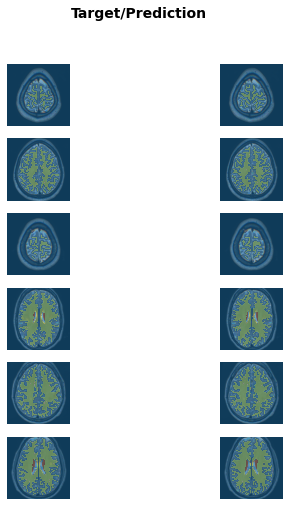

In [6]:
from fastai.vision.all import *

# preparation (data path)
#path = untar_data(URLs.CAMVID_TINY,'/home/yourname/fastai/data','/home/yourname/fastai/data')
path = '/content/drive/MyDrive/pvsseg/pvsseg'

# data loader
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, #fnames = get_image_files(path/"images"),
    fnames = get_image_files(path+"/images"),
    #label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    label_func = lambda o: path+'/labels/'+f'{o.stem}_P{o.suffix}',
    #codes = np.loadtxt(path/'codes.txt', dtype=str)
    codes = np.loadtxt(path+'/codes.txt', dtype=str)
)

# train a model
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

learn.show_results(max_n=6, figsize=(7,8))

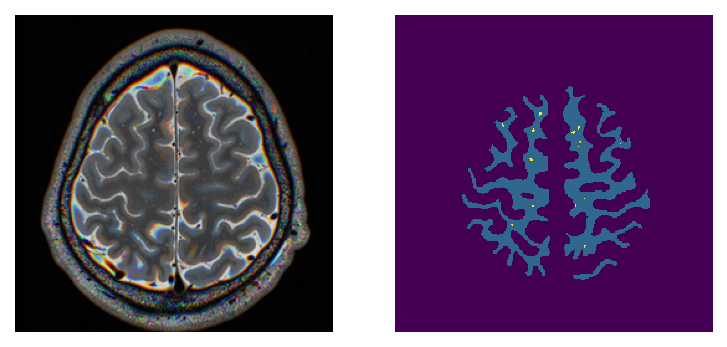

In [26]:
# evaluate with my data
img = PILImage.create('/content/drive/MyDrive/pvsseg/pvsseg/images/100206_177.png')
a,b,c = learn.predict(img)
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(a,vmin=0,vmax=3,interpolation='nearest')#,cmap='Pastel1')
plt.axis('off')
plt.show()